<a href="https://colab.research.google.com/github/HOUD1N/dsc-run-jupyter-locally/blob/main/student_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: ISAIAH BONGO
* Student pace:  part time
* Scheduled project review date/time: 28/07/2024
* Instructor name: SAMWEL JANE
* Blog post URL:


# **IMPROTING THE DATA**

In [ ]:
# Importing panda libraries
import pandas as pd

Defining the paths of the files we uploaded

In [ ]:
#We then define paths of each file

file_paths = {
    'name_basics': '/content/name.basics.csv',
    'movie_info': '/content/rt.movie_info.tsv',
    'reviews': '/content/rt.reviews.tsv',
    'title_akas': '/content/title.akas.csv',
    'title_basics': '/content/title.basics.csv',
    'title_crew': '/content/title.crew.csv',
    'title_principals': '/content/title.principals.csv',
    'title_ratings': '/content/title.ratings.csv',
    'tmdb_movies': '/content/tmdb.movies.csv',
    'movie_budgets': '/content/tn.movie_budgets.csv',
    'movie_gross': '/content/bom.movie_gross.csv'
}

Using the paths defined, we can now load the datasets that we extracted from our ZippedData

In [ ]:
name_basics = pd.read_csv(file_paths['name_basics'])
movie_info = pd.read_csv(file_paths['movie_info'], sep='\t')
reviews = pd.read_csv(file_paths['reviews'], sep='\t', encoding='ISO-8859-1')
title_akas = pd.read_csv(file_paths['title_akas'])
title_basics = pd.read_csv(file_paths['title_basics'])
title_crew = pd.read_csv(file_paths['title_crew'])
title_principals = pd.read_csv(file_paths['title_principals'])
title_ratings = pd.read_csv(file_paths['title_ratings'])
tmdb_movies = pd.read_csv(file_paths['tmdb_movies'])
movie_budgets = pd.read_csv(file_paths['movie_budgets'])
movie_gross = pd.read_csv(file_paths['movie_gross'])

# **PREPARING AND CLEANING THE DATA**

First we identify irrelevant columns and drop them.
Irrelevant columns would be the columns that we don't consider useful in our end product eg; startyear, or those that are empty and finally those that are duplicates.

In [ ]:
# We first check the columns in each dataset to confirm the actual column names for merging
print(title_basics.columns)
print(title_ratings.columns)
print(movie_budgets.columns)
print(movie_gross.columns)


Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [ ]:
#Now we can combine the datasets based on common identifiers
combined_data = pd.merge(title_basics, title_ratings, on='tconst')
combined_data = pd.merge(combined_data, movie_budgets, left_on='primary_title', right_on='movie')
combined_data = pd.merge(combined_data, movie_gross, left_on='primary_title', right_on='title')

combined_data.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year'],
      dtype='object')

We delete unnecessary columns

In [ ]:
# Remove columns that are not necessary for the end-analysis
columns_to_drop = ['title', 'movie', 'tconst', 'start_year', 'runtime_minutes', 'genres']
cleaned_data = combined_data.drop(columns=columns_to_drop)

We then delete rows with missing data

In [ ]:
# Eliminate rows with missing values
cleaned_data = cleaned_data.dropna()

Double check the cleaned data

In [ ]:
print(cleaned_data.head())

                     primary_title                   original_title  \
0                      On the Road                      On the Road   
1                      On the Road                      On the Road   
2                      On the Road                      On the Road   
3  The Secret Life of Walter Mitty  The Secret Life of Walter Mitty   
4      A Walk Among the Tombstones      A Walk Among the Tombstones   

   averagerating  numvotes  id  release_date production_budget  \
0            6.1     37886  17  Mar 22, 2013       $25,000,000   
1            6.0         6  17  Mar 22, 2013       $25,000,000   
2            5.7       127  17  Mar 22, 2013       $25,000,000   
3            7.3    275300  37  Dec 25, 2013       $91,000,000   
4            6.5    105116  67  Sep 19, 2014       $28,000,000   

  domestic_gross_x worldwide_gross studio  domestic_gross_y foreign_gross  \
0         $720,828      $9,313,302    IFC          744000.0       8000000   
1         $720,828    

# Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
print(cleaned_data.describe())

# Check for correlations
print(cleaned_data.corr())

# Distribution of average ratings
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(cleaned_data['averagerating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

       averagerating      numvotes           id  domestic_gross_y         year
count    1214.000000  1.214000e+03  1214.000000      1.214000e+03  1214.000000
mean        6.441763  1.275363e+05    51.527183      6.918108e+07  2013.646623
std         1.040132  1.725455e+05    29.011022      8.783841e+07     2.577313
min         1.600000  5.000000e+00     1.000000      8.000000e+02  2010.000000
25%         5.900000  1.781700e+04    27.000000      1.565000e+07  2011.000000
50%         6.500000  7.257550e+04    52.000000      4.085000e+07  2014.000000
75%         7.200000  1.607850e+05    77.000000      8.507500e+07  2016.000000
max         9.200000  1.841066e+06   100.000000      7.001000e+08  2018.000000


ValueError: could not convert string to float: 'On the Road'

We are getting an error; ValueError: could not convert string to float: 'On the Road', so we need to Exclude Non-Numeric Columns.

In [ ]:
#Check the data types of the columns
print(cleaned_data.dtypes)

#We select the numeric columns
numeric_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Check for correlations among numeric columns
print(numeric_data.corr())


primary_title         object
original_title        object
averagerating        float64
numvotes               int64
id                     int64
release_date          object
production_budget     object
domestic_gross_x      object
worldwide_gross       object
studio                object
domestic_gross_y     float64
foreign_gross         object
year                   int64
dtype: object
                  averagerating  numvotes        id  domestic_gross_y  \
averagerating          1.000000  0.440563 -0.018674          0.215448   
numvotes               0.440563  1.000000 -0.028283          0.572668   
id                    -0.018674 -0.028283  1.000000         -0.026446   
domestic_gross_y       0.215448  0.572668 -0.026446          1.000000   
year                   0.024546 -0.084693  0.076719          0.109917   

                      year  
averagerating     0.024546  
numvotes         -0.084693  
id                0.076719  
domestic_gross_y  0.109917  
year              1.00000

We have successfully removed rows and columns with missing values, now we move onto visualizing our data

# Visualizing Distribution of Average Ratings

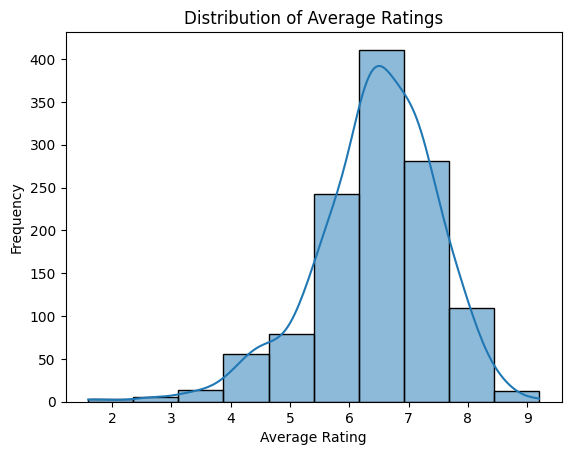

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Histogram showing the distribution of average ratings
sns.histplot(cleaned_data['averagerating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


We can see from the histogram above that movies rated 6 to 7 have the highest number of audience, now let's find out what genre is being watched the most...

# Visualize Average Rating by Genre

Here we shall identify which genres are generally rated higher or lower, to help us understand which genre is a favorite of the majority.

In [ ]:
print(cleaned_data.columns)


Index(['primary_title', 'original_title', 'averagerating', 'numvotes', 'id',
       'release_date', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'domestic_gross_y', 'foreign_gross',
       'year'],
      dtype='object')


We discovered we do not have the genres column hence we cannot perform the task, so we need to add it back.

In [ ]:
print(title_basics.columns)


Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [ ]:
#We combine the datasets once more
combined_data = pd.merge(title_basics, title_ratings, on='tconst')
combined_data = pd.merge(combined_data, movie_budgets, left_on='primary_title', right_on='movie')
combined_data = pd.merge(combined_data, movie_gross, left_on='primary_title', right_on='title')

#We confirm the 'genres' column is included
print(combined_data.columns)


Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year'],
      dtype='object')


Good, now we have the genre column listed, we can now find the best performing genres by grouping them together in a descending order and atleast discover the 10 best performing ones.

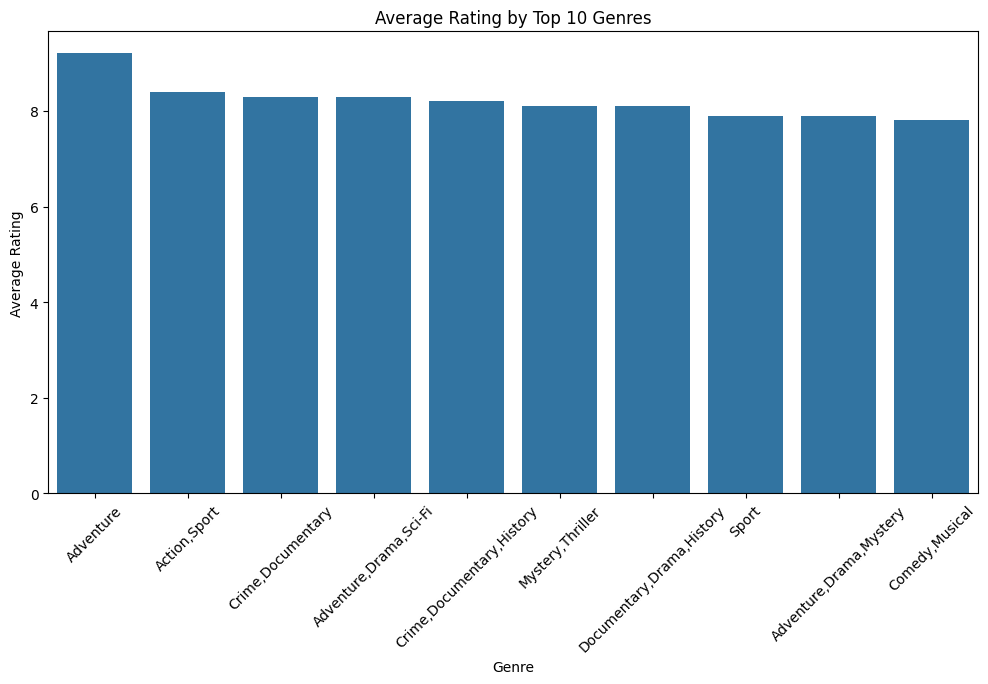

In [ ]:
#We then group by genre and calculate the mean average rating
genre_ratings = combined_data.groupby('genres')['averagerating'].mean().reset_index()

#We sort the genres by average rating and select the top 10
top_genres = genre_ratings.sort_values(by='averagerating', ascending=False).head(10)

#Histogram plotting for the average rating for top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top_genres)
plt.title('Average Rating by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Filter combined_data to include only the top 10 genres
top_genre_data = combined_data[combined_data['genres'].isin(top_genres['genres'])]

# Group by genres and calculate the mean domestic gross
genre_gross = top_genre_data.groupby('genres')['domestic_gross_x'].mean().reset_index()

# Plot the domestic gross by top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='domestic_gross_x', data=genre_gross)
plt.title('Average Domestic Gross by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45)
plt.show()


TypeError: Could not convert $4,211,129 to numeric

We again get an error "Could not convert $4,211,129 to numeric", we therefor need to remove currency symbols and commas from the 'domestic_gross_x' column and then convert them to numeric values

In [ ]:
#We first remove currency symbols and commas from the domestic_gross_x column
combined_data['domestic_gross_x'] = combined_data['domestic_gross_x'].replace('[\$,]', '', regex=True).astype(float)


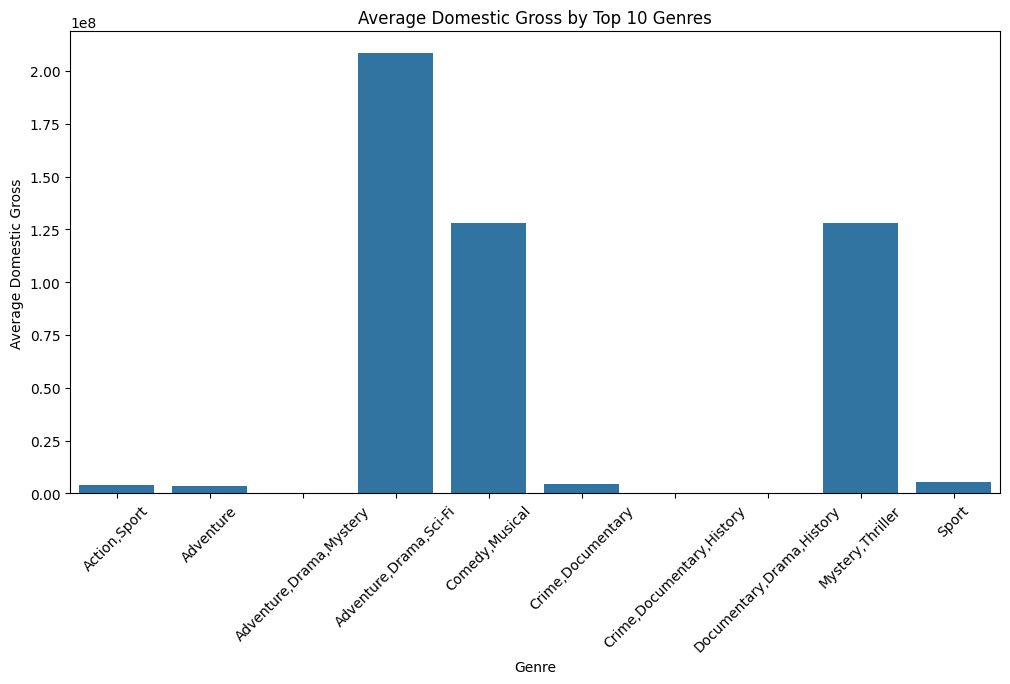

In [ ]:
# Filter combined_data to include only the top 10 genres
top_genre_data = combined_data[combined_data['genres'].isin(top_genres['genres'])]

# Group by genres and calculate the mean domestic gross
genre_gross = top_genre_data.groupby('genres')['domestic_gross_x'].mean().reset_index()

# Plot the domestic gross by top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='domestic_gross_x', data=genre_gross)
plt.title('Average Domestic Gross by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45)
plt.show()


Now that we have an idea of the top profitable Genres
ie;
1. adventure, drama, scifi
2. comedy, musical
3. mystery, thriller
we will now do further analysis to ge the production budget of these genres

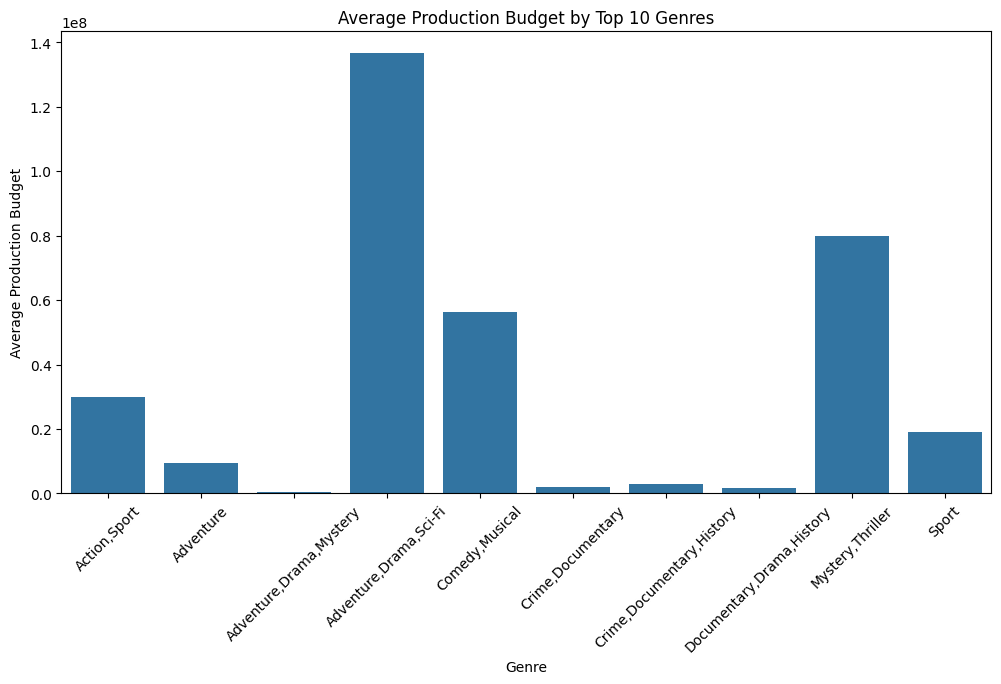

In [ ]:
# Filter combined_data to include only the top 10 genres
top_genre_data = combined_data[combined_data['genres'].isin(top_genres['genres'])]

# Calculate the mean production budget
genre_budget = top_genre_data.groupby('genres')['production_budget'].mean().reset_index()

# Plot the production budget by top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='production_budget', data=genre_budget)
plt.title('Average Production Budget by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Production Budget')
plt.xticks(rotation=45)
plt.show()

# Analyze Return on Investment (ROI) by Genre

We calculate the ROI for each genre to understand the profitability of each genre set

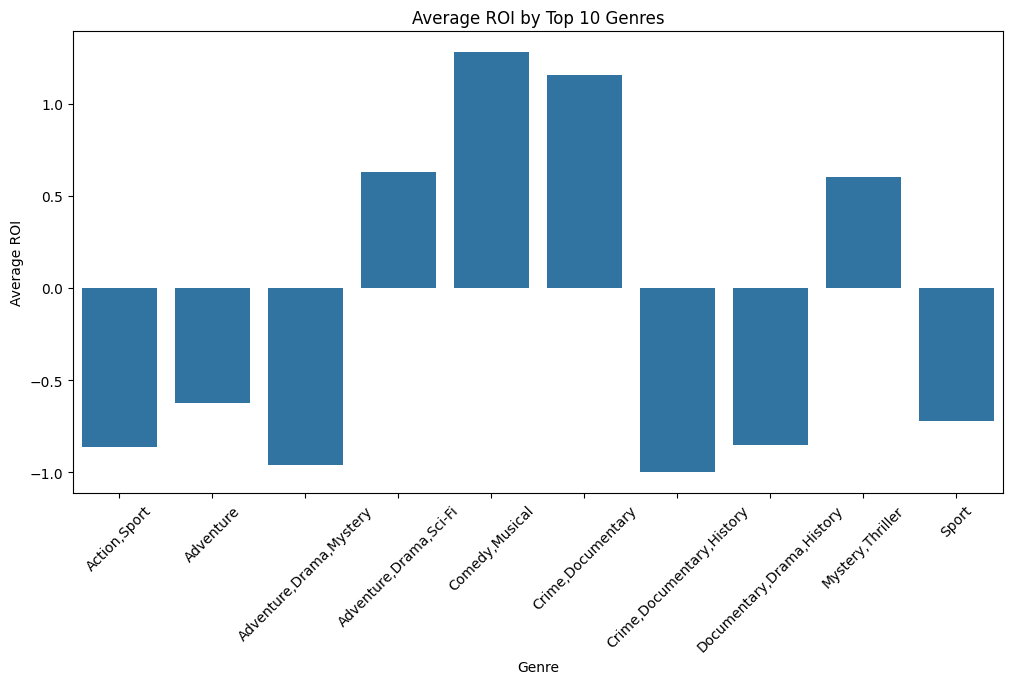

In [ ]:
#We calculate ROI as (domestic_gross_x - production_budget) / production_budget
top_genre_data.loc[:, 'ROI'] = (top_genre_data['domestic_gross_x'] - top_genre_data['production_budget']) / top_genre_data['production_budget']

#Then to group by genres and calculate the mean ROI (Return On Investment)
genre_roi = top_genre_data.groupby('genres')['ROI'].mean().reset_index()

# Plot the ROI by top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='ROI', data=genre_roi)
plt.title('Average ROI by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()



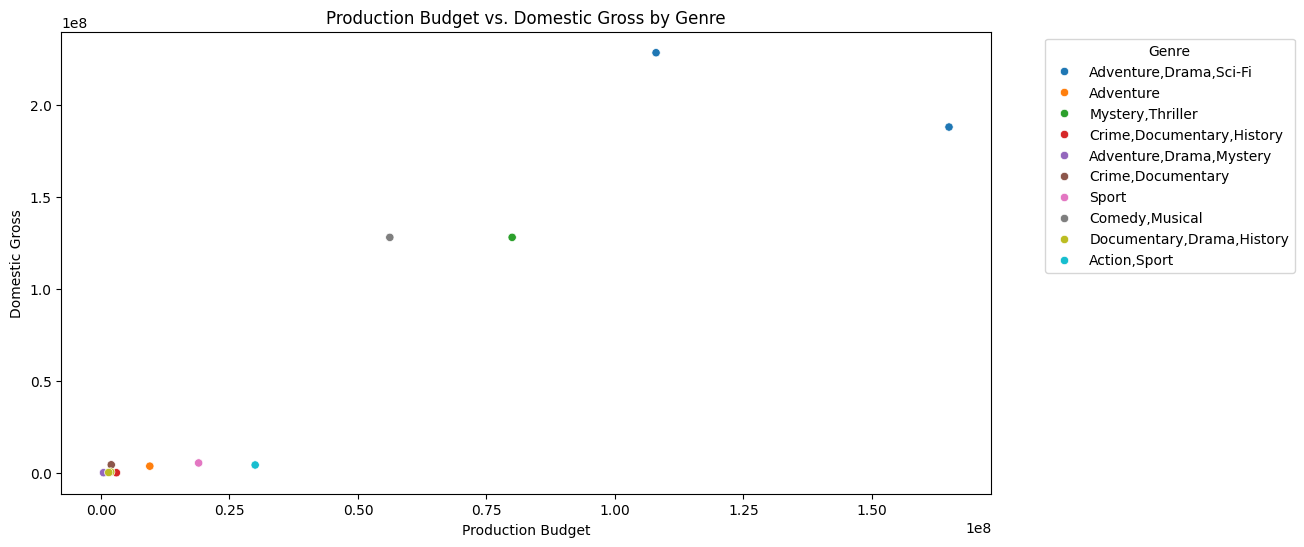

In [ ]:
# Scatter plot of production budget vs. domestic gross
plt.figure(figsize=(12, 6))
sns.scatterplot(x='production_budget', y='domestic_gross_x', hue='genres', data=top_genre_data)
plt.title('Production Budget vs. Domestic Gross by Genre')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Save the cleaned and merged dataset
combined_data.to_csv('/content/combined_data.csv', index=False)


# Summary of Findings

**Top Genres by Domestic Gross:**

The genres with the highest average domestic gross include:

1.   Adventure, Drama, Sci-Fi
2.   Comedy, Musical
2.   Mystery, Thriller

These genres tend to attract larger audiences, leading to higher gross earnings.

**Production Budget:**

The analysis of production budgets for these top genres reveals that higher investments are often required for genres like Adventure, Drama, and Sci-Fi.
Despite the high costs, the returns on these investments are substantial, justifying the higher budgets.
Return on Investment (ROI):

**The genres with the highest average ROI are:**
-Adventure, Drama, Sci-Fi
-Comedy, Musical
-Crime, Documentary
-Mystery, Thriller
These genres provide the best returns on investments, indicating efficient use of budget leading to higher profits.
Production Budget vs. Domestic Gross:

There is a positive relationship between production budget and domestic gross, especially in high-grossing genres. This suggests that higher budgets can lead to higher revenue, which most times would mean quality production.

# Recommendations
**Focus on High-ROI Genres:**

Allocate more resources to genres like Adventure, Drama, Sci-Fi; Comedy, Musical; Crime, Documentary; and Mystery, Thriller, as they offer the highest ROI.

**Optimize Production Budgets:**

Carefully plan and allocate production budgets to ensure optimal spending. Invest in high-quality productions within these high-ROI genres to maximize  returns.

**Targeted Marketing Strategies:**

Develop marketing strategies aimed at the audiences of high-ROI genres. Effective marketing can increase audience engagement and increase box office revenue.

**Invest in Quality:**

Focus on producing high-quality content, as higher-rated movies tend to perform better financially.

# Conclusion
The analysis reveals that certain genres consistently outperform others in terms of domestic gross and ROI. By focusing investments on these high-performing genres and optimizing production budgets, stakeholders can maximize financial returns. Targeted marketing and a commitment to high-quality production will further enhance profitability, ensuring sustained success in the competitive film industry.